In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/major_project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import cv2
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from scipy.spatial import distance
import numpy as np
import pandas as pd
import cv2
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
face_model = cv2.CascadeClassifier('/content/drive/MyDrive/major_project/cascade_model/haarcascade_frontalface_default.xml')

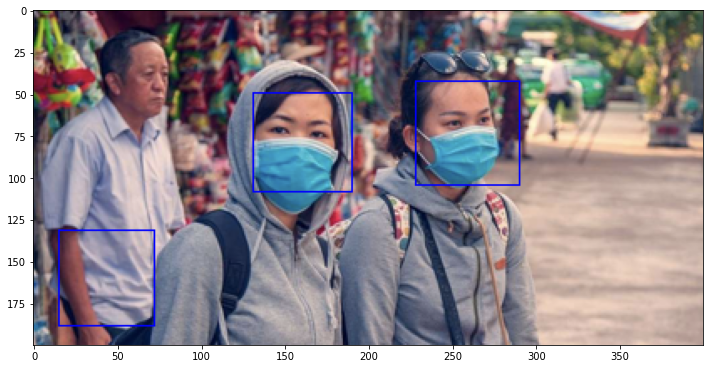

In [ ]:
import matplotlib.pyplot as plt
#trying it out on a sample image
img = cv2.imread('../content/drive/MyDrive/major_project/dataset/images/maksssksksss710.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

In [ ]:
MIN_DISTANCE = 130

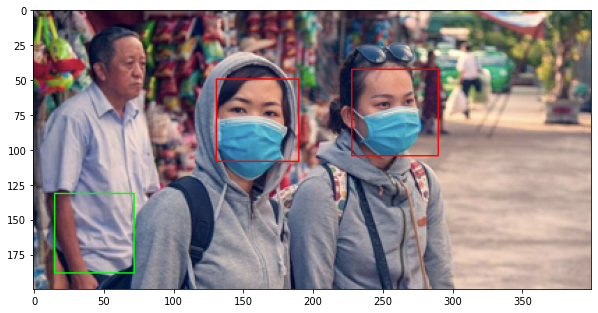

In [ ]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")

In [ ]:
#Load train and test set
train_dir = '../content/drive/MyDrive/major_project/Face Mask Dataset/Train'
test_dir = '../content/drive/MyDrive/major_project/Face Mask Dataset/Test'
val_dir = '../content/drive/MyDrive/major_project/Face Mask Dataset/Validation'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 2)                 16386     
                                                                 
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [ ]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,
                              validation_steps=len(val_generator)//32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
9/9 [==============================] - 147s 16s/step - loss: 0.6112 - accuracy: 0.6875
Epoch 2/20
9/9 [==============================] - 67s 7s/step - loss: 0.2775 - accuracy: 0.8785
Epoch 3/20
9/9 [==============================] - 64s 6s/step - loss: 0.1950 - accuracy: 0.9271
Epoch 4/20
9/9 [==============================] - 63s 6s/step - loss: 0.1407 - accuracy: 0.9444
Epoch 5/20
9/9 [==============================] - 61s 6s/step - loss: 0.1036 - accuracy: 0.9706
Epoch 6/20
9/9 [==============================] - 60s 6s/step - loss: 0.1212 - accuracy: 0.9618
Epoch 7/20
9/9 [==============================] - 61s 6s/step - loss: 0.1122 - accuracy: 0.9583
Epoch 8/20
9/9 [==============================] - 59s 6s/step - loss: 0.1280 - accuracy: 0.9479
Epoch 9/20
9/9 [==============================] - 59s 6s/step - loss: 0.0760 - accuracy: 0.9896
Epoch 10/20
9/9 [==============================] - 61s 6s/step - loss: 0.1130 - accuracy: 0.9514
Epoch 11/20
9/9 [====================

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.05946006253361702, 0.981249988079071]

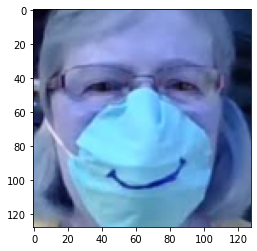

In [ ]:
sample_mask_img = cv2.imread('../content/drive/MyDrive/major_project/Face Mask Dataset/Test/WithMask/1174.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [ ]:
model.predict(sample_mask_img)

1/1 [==============================] - 0s 387ms/step


array([[0.8952111, 0.1539638]], dtype=float32)

In [ ]:
model.save('/content/drive/MyDrive/major_project/model/masknet.h5')

In [ ]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

In [ ]:
faces

array([[228,  42,  62,  62],
       [131,  49,  59,  59],
       [ 15, 131,  57,  57]], dtype=int32)

1/1 [==============================] - 0s 219ms/step


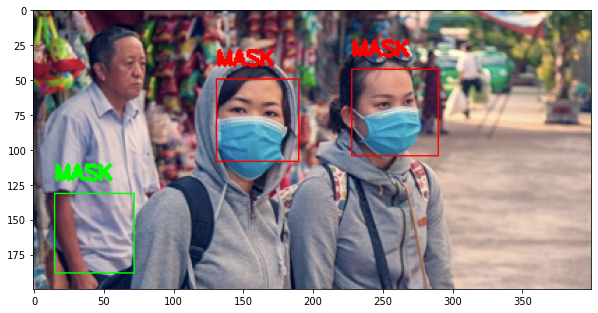

In [ ]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")

In [ ]:
path = "/content/drive/MyDrive/major_project/Face Mask Detection2"

In [ ]:
dataset = {
    "image_path": [],
    "mask_status": [],
    "where": []
}

for where in os.listdir(path):
    # print(where)  
    for status in os.listdir(os.path.join(path,where)):
        # print(status)
        # print(os.path.join(path,where,status,"*.png"))
        for image in glob.glob(os.path.join(path,where,status,"*.png")):
            print(image)
            dataset["image_path"].append(image)
            dataset["mask_status"].append(status)
            dataset["where"].append(where)
            
dataset = pd.DataFrame(dataset)
dataset.head()

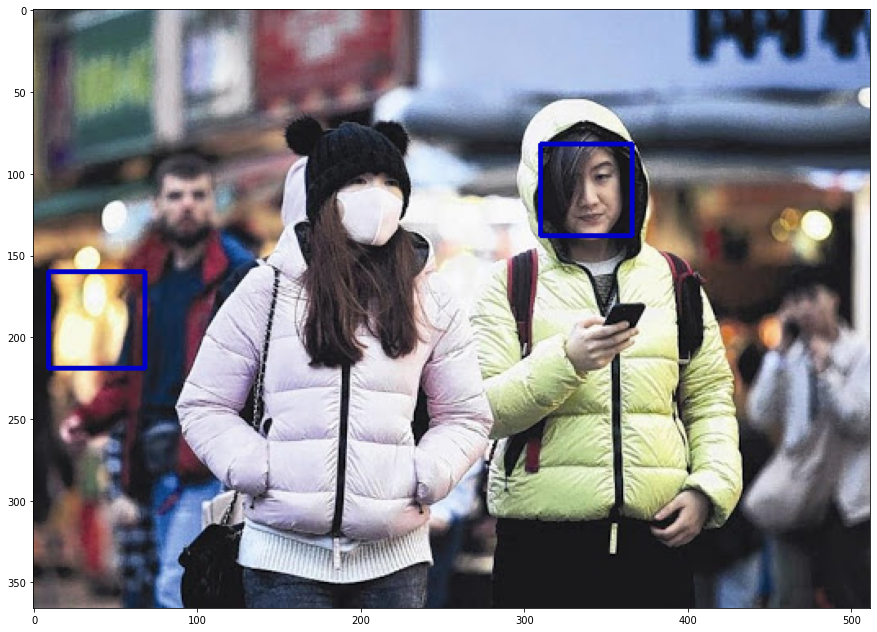

In [ ]:
## Choosing a random image to detect the face in the image
face_model = cv2.CascadeClassifier('/content/drive/MyDrive/major_project/cascade_model/haarcascade_frontalface_default.xml')

## Choosing the image from the directory
img = cv2.imread("/content/drive/MyDrive/major_project/Face Mask detection/images/maksssksksss0.png")

## Converting the image to grayscale to apply haarcascade algorithm
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

## Returns the x, y, w, h co-ordinates as numpy arrays for all the detected faces
detected_face = face_model.detectMultiScale(img)

## Converting from grayscale to colored image
output_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

## Drawing rectangle box around the faces in the image
for (x, y, w, h) in detected_face:
    cv2.rectangle(output_img, (x,y), (x+w, y+h), (0, 0, 200), 2)
    
## Displaying the image
plt.figure(figsize = (15, 15))
plt.imshow(output_img)


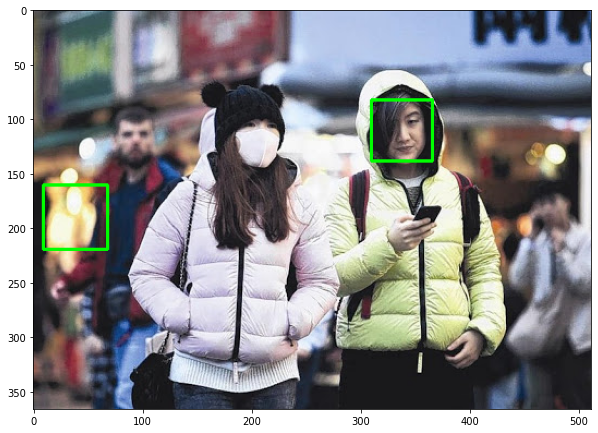

In [ ]:
if len(detected_face) >= 2:
    # Track to check for violation of social distance violation
    label = [0 for i in range(len(detected_face))]
    
    # Getting the distance from one image to rest of the image  
    for i in range(len(detected_face)-1):
        for j in range(i+1, len(detected_face)):
            # [:2] gets only x, y co ordinates
            dist = distance.euclidean(detected_face[i][:2], detected_face[j][:2])
            # Checking if the distance is less than 6 feet 
            if dist < 130:
                # If less than 6 feet, flag the respective images
                label[i] = 1
                label[j] = 1
    
    # Coloring the image
    new_image = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    # Coloring the rectangle around the image
    for i in range(len(detected_face)):
        (x, y, w, h) = detected_face[i]
        if label[i] == 1:
            # If its 1, then the distance is less than 6 feet so mark red
            cv2.rectangle(new_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        else:
            # If not mark green 
            cv2.rectangle(new_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
         
    plt.figure(figsize = (10, 10))
    plt.imshow(new_image)

With Mask: 5909
Without Mask: 5902


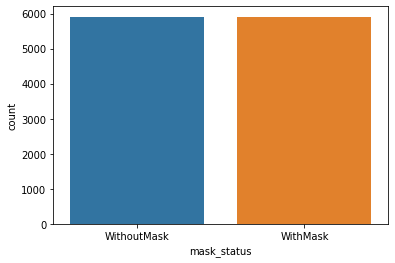

In [ ]:
print(f"With Mask:", dataset.value_counts("mask_status")[0])
print(f"Without Mask:", dataset.value_counts("mask_status")[1])

## Plotting the numbers
sns.countplot(x = dataset["mask_status"])

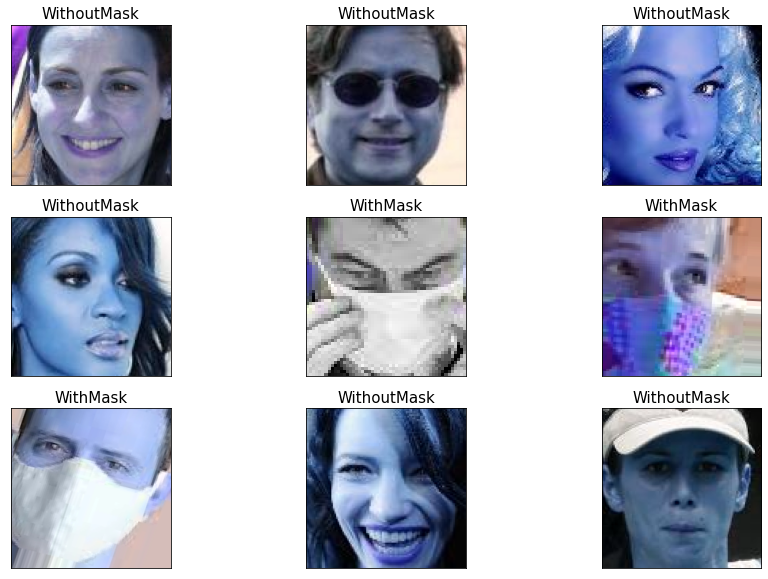

In [ ]:
plt.figure(figsize = (15, 10))

for i in range(9):
    random = np.random.randint(1, len(dataset))
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.imread(dataset.loc[random,"image_path"]))
    plt.title(dataset.loc[random,"mask_status"], size = 15)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [ ]:
train_df = dataset[dataset["where"] == "Train"]
test_df = dataset[dataset["where"] == "Test"]
valid_df = dataset[dataset["where"] == "Validation"]

print(train_df.head(10))

## Shuffling the dataset 
train_df = train_df.sample(frac = 1)
test_df = test_df.sample(frac = 1)
valid_df = valid_df.sample(frac = 1)

print("\n After Shuffling \n")
print(train_df.head(10))

                                             image_path  mask_status  where
1792  /content/drive/MyDrive/major_project/Face Mask...  WithoutMask  Train
1793  /content/drive/MyDrive/major_project/Face Mask...  WithoutMask  Train
1794  /content/drive/MyDrive/major_project/Face Mask...  WithoutMask  Train
1795  /content/drive/MyDrive/major_project/Face Mask...  WithoutMask  Train
1796  /content/drive/MyDrive/major_project/Face Mask...  WithoutMask  Train
1797  /content/drive/MyDrive/major_project/Face Mask...  WithoutMask  Train
1798  /content/drive/MyDrive/major_project/Face Mask...  WithoutMask  Train
1799  /content/drive/MyDrive/major_project/Face Mask...  WithoutMask  Train
1800  /content/drive/MyDrive/major_project/Face Mask...  WithoutMask  Train
1801  /content/drive/MyDrive/major_project/Face Mask...  WithoutMask  Train

 After Shuffling 

                                              image_path  mask_status  where
6452   /content/drive/MyDrive/major_project/Face Mask...  WithoutMa

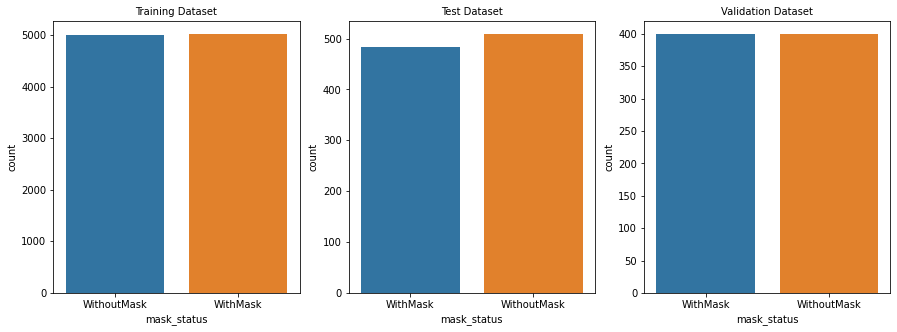

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x = train_df["mask_status"])
plt.title("Training Dataset", size = 10)

plt.subplot(1, 3, 2)
sns.countplot(x = test_df["mask_status"])
plt.title("Test Dataset", size = 10)

plt.subplot(1, 3, 3)
sns.countplot(x = valid_df["mask_status"])
plt.title("Validation Dataset", size = 10)

plt.show()

In [ ]:
train_df = train_df.reset_index().drop("index", axis = 1)
train_df.head()

,image_path,mask_status,where
0,/content/drive/MyDrive/major_project/Face Mask...,WithoutMask,Train
1,/content/drive/MyDrive/major_project/Face Mask...,WithMask,Train
2,/content/drive/MyDrive/major_project/Face Mask...,WithoutMask,Train
3,/content/drive/MyDrive/major_project/Face Mask...,WithoutMask,Train
4,/content/drive/MyDrive/major_project/Face Mask...,WithMask,Train


In [ ]:
## Reading all the image into a list and changing the size of the image to (150,150)
data = []
image_size = 150

for i in range(len(train_df)):
    ## Converting the image into grayscale
    img_array = cv2.imread(train_df["image_path"][i], cv2.IMREAD_GRAYSCALE)

    ## Resizing the array
    new_image_array = cv2.resize(img_array, (image_size, image_size))

    ##Encoding the image with the label
    if train_df["mask_status"][i] == "WithMask":
        data.append([new_image_array, 1])
    else:
        data.append([new_image_array, 0])

In [ ]:
data = np.array(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
data[0][0].shape

(150, 150)

In [ ]:
np.random.shuffle(data)

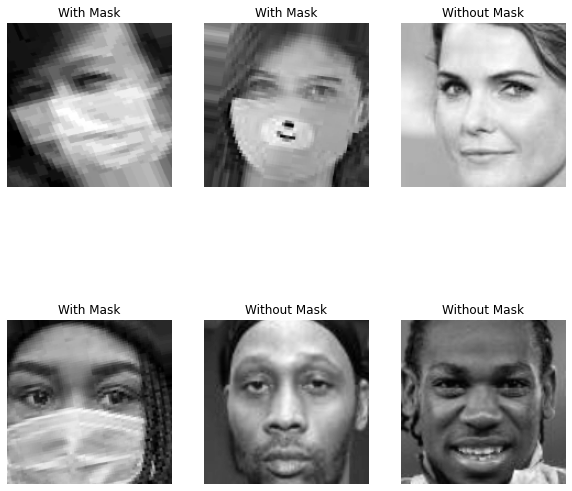

In [ ]:

fig, ax = plt.subplots(2, 3, figsize=(10, 10))

for row in range(2):
    for col in range(3):
        image_index = row*100+col
        
        ax[row, col].axis("off")
        ax[row,col].imshow(data[image_index][0], cmap = "gray")
    
        if data[image_index][1] == 0:
            ax[row, col].set_title("Without Mask")
        else:
            ax[row, col].set_title("With Mask")
            
plt.show()


In [ ]:
X = []
y = []

## Seperating X and y
for image in data:
    X.append(image[0])
    y.append(image[1])
    
## Converting X and y to numpy array as Tensorflow accepts only numpy arrays
X = np.array(X)
y = np.array(y)


In [ ]:
X = X/255

### Train Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
# model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# X_train = X_train.reshape(-1, 32, 150, 150)
## Reshaping training set to match Conc2D
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)

history = model.fit(X_train, y_train, epochs=5, batch_size = 32)

Epoch 1/5
251/251 [==============================] - 1185s 5s/step - loss: 0.2737 - accuracy: 0.8779
Epoch 2/5
251/251 [==============================] - 1207s 5s/step - loss: 0.0801 - accuracy: 0.9716
Epoch 3/5
251/251 [==============================] - 1163s 5s/step - loss: 0.0526 - accuracy: 0.9813
Epoch 4/5
251/251 [==============================] - 1128s 4s/step - loss: 0.0382 - accuracy: 0.9852
Epoch 5/5
251/251 [==============================] - 1197s 5s/step - loss: 0.0172 - accuracy: 0.9944


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 128)               18874496  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

In [ ]:
model.evaluate(X_val, y_val)

63/63 [==============================] - 75s 1s/step - loss: 0.1168 - accuracy: 0.9731


[0.11680063605308533, 0.9730538725852966]

In [ ]:
model.save('/content/drive/MyDrive/major_project/model/face_mask.h5')

1/1 [==============================] - 0s 69ms/step
[[1.]]
1/1 [==============================] - 0s 59ms/step
[[1.]]
1/1 [==============================] - 0s 57ms/step
[[0.]]
1/1 [==============================] - 0s 58ms/step
[[1.]]
1/1 [==============================] - 0s 61ms/step
[[0.]]
1/1 [==============================] - 0s 60ms/step
[[0.]]


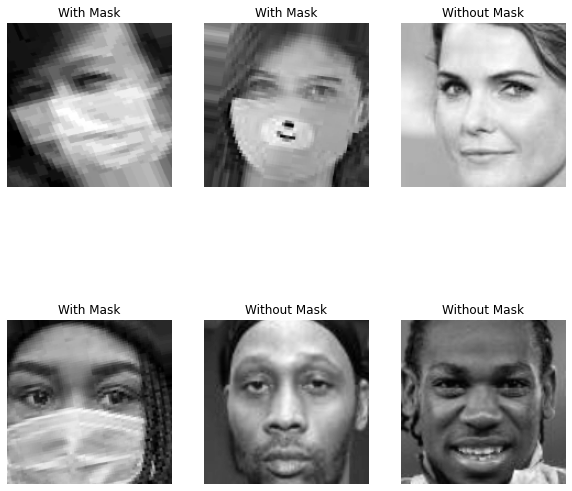

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10))

for row in range(2):
    for col in range(3):
        image_index = row*100+col
        
        ax[row, col].axis("off")
        ax[row,col].imshow(data[image_index][0], cmap = "gray")
        out = model.predict(np.expand_dims(data[image_index][0], axis=0))
        # print(np.expand_dims(data[image_index][0], axis=0).shape)
        print(out)
        if data[image_index][1] == 0:
            ax[row, col].set_title("Without Mask")
        else:
            ax[row, col].set_title("With Mask")
            
plt.show()